In [54]:
import pandas.api.types as ptypes
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [55]:
# load dataset
df=pd.read_csv("classification_2.csv",delimiter=',')
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [56]:
# rename columns
df.columns=[
        "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Martial_Status",
        "Occupation", "Relationship", "Race", "Sex", "Capital_Gain", "Capital_Loss",
        "Hours_per_week", "Country", "Target"]

In [57]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [58]:
df['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [59]:
df['Target'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [60]:
df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-Num     0
Martial_Status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_Gain      0
Capital_Loss      0
Hours_per_week    0
Country           0
Target            0
dtype: int64

In [61]:
df.isnull().values.any()

False

In [62]:
# replace value -1,1 for <=50K/>50K
df['Target'].replace(' <=50K',1,inplace=True)
df['Target'].replace(' >50K',0,inplace=True)

In [63]:
df.head()

,Age,Workclass,fnlwgt,Education,Education-Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


In [64]:
# display columns in dataset
df.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Country', 'Target'],
      dtype='object')

In [65]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [66]:
# display shape of dataset
print('dataset has {0} rows and {1} column'.format(df.shape[0],df.shape[1]))

dataset has 32560 rows and 15 column


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
Age               32560 non-null int64
Workclass         32560 non-null object
fnlwgt            32560 non-null int64
Education         32560 non-null object
Education-Num     32560 non-null int64
Martial_Status    32560 non-null object
Occupation        32560 non-null object
Relationship      32560 non-null object
Race              32560 non-null object
Sex               32560 non-null object
Capital_Gain      32560 non-null int64
Capital_Loss      32560 non-null int64
Hours_per_week    32560 non-null int64
Country           32560 non-null object
Target            32560 non-null int64
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [68]:
# checking missing values
df.columns[df.isnull().any()]

Index([], dtype='object')

In [69]:
# getting target value greater  than 50k and less than 50k
df['Target'].value_counts()

1    24719
0     7841
Name: Target, dtype: int64

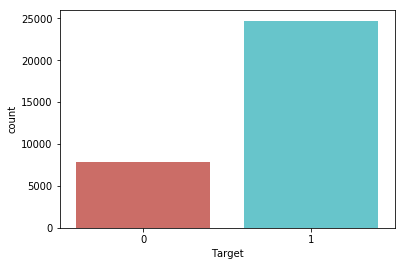

In [71]:
sb.countplot(x='Target',  data=df, palette='hls')
plt.show()

In [72]:
df.duplicated().sum()

24

In [73]:
# remove duplicated values from dataframe
df.drop_duplicates(keep=False, inplace=True)
df.duplicated().sum()

0

In [74]:
df.shape

(32513, 15)

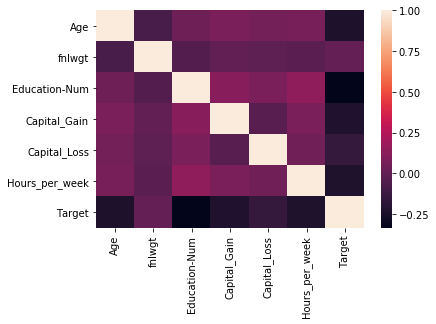

In [75]:
corr = df.corr()
sb.heatmap(corr)

In [76]:
df.shape

(32513, 15)

In [77]:
df.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education-Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [78]:
df = pd.get_dummies(df,columns=["Workclass","Education","Martial_Status","Occupation","Relationship", "Race", "Sex","Country"])
df.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,50,83311,13,0,0,13,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [79]:
def Feature_Scaling(df):
        for column in df.columns:
            df[column] = ((df[column] - df[column].min()) /
                             (df[column].max() - df[column].min()))
        return df

In [80]:
df = Feature_Scaling(df)

In [81]:
df.shape

(32513, 109)

In [82]:
df.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [83]:
# split data into train and test
def Split(data):
    train_set=0.70*len(data)
    train=int(train_set)
#         print(train)
    test_set=0.30*len(data)
    test=int(test_set)
        
    return train,test

In [84]:
train,test = Split(df)
train_data=df.head(train)
test_data=df.tail(test)

In [85]:
train_data.head()

,Age,fnlwgt,Education-Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ ?,Workclass_ Federal-gov,Workclass_ Local-gov,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,0.452055,0.048238,0.800000,0.0,0.0,0.122449,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.287671,0.138113,0.533333,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.493151,0.151068,0.400000,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.150685,0.221488,0.800000,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.273973,0.184932,0.866667,0.0,0.0,0.397959,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
train_data.shape

(22759, 109)

In [87]:
test_data.shape

(9753, 109)

In [88]:
# Separating the output and the parameters data frame
def separate(df):
    output = df.Target
    return df.drop('Target', axis=1), output

In [89]:
train_data_x,train_data_y = separate(train_data)
test_data_x,test_data_y=separate(test_data)

In [90]:
train_data_x.shape

(22759, 108)

In [91]:
test_data_x.shape

(9753, 108)

In [92]:
import random
import math
import operator


class KNN_Algorithm:
    def __init__(self):
        self.k = 5
        
#     calculate distance between two data instance
    def euclidien(self,test,train,test_lenth):
        distance = 0
        for l in range(test_lenth):
            distance += pow(test[l]-train[l],2)
#         print("distance",distance)
        return math.sqrt(distance)
        
#   get neighbors having atleast distance from new point
    def find_neighbours(self,x_train_data,y_train_data,x_test_data, k):
        distances = []
        #leave the own test_data[i] point
        test_lenth = len(x_test_data)-1
        for i in range(len(x_train_data)):
            dist = self.euclidien(x_test_data,x_train_data[i],test_lenth)
            distances.append((y_train_data[i],dist))
        distances.sort(key=operator.itemgetter(1))
        neighbors =  []
        for k in range(k):
            neighbors.append(distances[k][0])
#         print("neighbor",neighbors)
        return neighbors
        
        
#       get response and decide which class it belongs 
    def getResponse(self,neighbors):
        classes = {}
#         print("neigh:",neighbors)
        for x in range(len(neighbors)):
            response = neighbors[x]
            if response in classes:
                classes[response] += 1
            else:
                classes[response] = 1
                
        sortedVotes = sorted(classes.items(), key=operator.itemgetter(1), reverse=True)
#         print("sortedVotes",sortedVotes)
        return sortedVotes[0][0]

    
#     calculate accuracy
    def getAccuracy(self,y_test_data, predictions):
        correct = 0
        for y in range(len(y_test_data)):
            if y_test_data[y] == predictions[y]:
                correct += 1
        return (correct/float(len(y_test_data))) * 100.0
        
        
def main():
    obj = KNN_Algorithm()
    
    # calling method by class object
    x_train_data = np.array(train_data_x[:2000])

    y_train_data = np.array(train_data_y[:2000])
     
    x_test_data = np.array(test_data_x[:800])

    y_test_data = np.array(test_data_y[:800])
    
#     generate predictions
    predictions=[]
    k = 5
    for x in range(len(x_test_data)):
        neighbors = obj.find_neighbours(x_train_data,y_train_data,x_test_data[x], k)
        result = obj.getResponse(neighbors)
        predictions.append(result)
        print('predicted value =' + repr(result) + ', actual value =' + repr(y_test_data[x]))
    accuracy = obj.getAccuracy(y_test_data, predictions)
    print('Accuracy =' + repr(accuracy) + '%')

    
main()


predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =1.0


predicted value =0.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =0.0
predicted value =0.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =0.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =0.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =1.0
predicted value =1.0, actual value =0.0


predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =1.0
predicted value =0.0, actual value =1.0


predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =0.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =0.0
predicted value =0.0, actual value =0.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =0.0, actual value =0.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =1.0
predicted value =1.0, actual value =0.0
predicted value =1.0, actual value =1.0
